<a href="https://colab.research.google.com/github/williamokomba/dsp6-galaxy-team-w5-project/blob/master/dsp6_team_galaxy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Moringa prep Data science team project: week 5**


**Team members**

1.   william Okomba
2.   Janet Mumo
3.   Joseph Nyingi
4.   Winfred Njoroge



**Objective**
---
Identify the most populated and densely populated per square kilometer county as per 2019 Census in Kenya.


Dataset provided


1.  Population by sex and County[link text](https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/384b93cf-ede0-4e05-9f36-a8e8e09b21a7/download/kenya-population-by-sex-and-county.csv)
2.   Population and household[link text](https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/111a3d9d-c676-4d5a-9600-d5acb1250b87/download/population-houseshold-data.csv)
3.   Kenya land area by population[link text](https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/da01bf5a-61d7-43e5-9009-7b54e249e984/download/kenya-population-land-area-population-density_by_county.csv)
4.  data source:Open Africa [link text](https://africaopendata.org/dataset/2019-kenya-population-and-housing-census)
5. note: we combined the 3 tables using excel to come up with one Dataset 2019_population.csv [link text](https://docs.google.com/spreadsheets/d/1ReZwMR3ZUlOS1WL06G-OeKqHx7l78Sscogs-a-DI8Yo/edit?usp=sharing)




Main steps to be followed

*   load the dataset into python
*   clean datasets
1.   Identify the total population in 2019 census
2.  Identify the most populated Counties as per the 2019 Census.
3.  Identify the most densely  populated county per sq.km.
4.  Identify the county  with the highest average households
5.  Identify the county with the highest land area per sqaure kilometer.

bonus:
7. indetify counties with the least densely  populated per sq.km
8.  Identify the intersex gender distributed among counties




























##1.0 Importing our libraries

In [67]:
# Let's import the pandas library
#
import pandas as pd
# as well as the Numpy library
import numpy as np

##1.1 Reading the Dataset from our CSV file.

*The dataset we will use contains information about the 2019 Census - The kenyan population by sex land area, and household.*
*   Dataset link or access [[link text](https://docs.google.com/spreadsheets/d/1_IaSym0s3LnRc3-KKpnUsnVJS3TPl7uJRYcPs04cuBo/edit?usp=sharing)]







In [78]:
# Let's upload and read the data from the CSV file and create the dataframe to be used
df1 = pd.read_csv("2019_population.csv")

##1.2 Previewing our Dataset

In [69]:
#a. Let's preview the first 5 rows of our data
df = pd.read_csv("2019_population.csv")
df.head()

,name,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),Male,Female,Intersex,Total_gender,No.of Households,Avg Household size,number
0,Kenya,47564296,580876.3,82,23548056,24014716,1524,47564296,12143913,39,1
1,Mombasa,1208333,219.9,5495,610257,598046,30,1208333,378422,31,2
2,Kwale,866820,8267.1,105,425121,441681,18,866820,173176,50,3
3,Kilifi,1453787,12539.7,116,704089,749673,25,1453787,298472,48,4
4,Tana River,315943,37950.5,8,158550,157391,2,315943,68242,46,5


## 1.3 Accessing Information about our Dataset

In [70]:
#b. Getting to know more about the dataset by accessing its information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   name                                 48 non-null     object 
 1   Population                           48 non-null     int64  
 2   Land Area (Sq. Km)                   48 non-null     float64
 3   Population Density (No. per Sq. Km)  48 non-null     int64  
 4   Male                                 48 non-null     int64  
 5   Female                               48 non-null     int64  
 6   Intersex                             48 non-null     int64  
 7   Total_gender                         48 non-null     int64  
 8   No.of Households                     48 non-null     int64  
 9   Avg Household size                   48 non-null     int64  
 10  number                               48 non-null     int64  
dtypes: float64(1), int64(9), object(1)

our dataset has 48 rows and 11 colunms, it contains floats, integers, and object/string and its 4.2kb of memory size.

In [71]:
#converting data type
df1.convert_dtypes().dtypes. inplace = True

In [72]:
df1.dtypes

name                                    object
Population                               int64
Land Area (Sq. Km)                     float64
Population Density (No. per Sq. Km)      int64
Male                                     int64
Female                                   int64
Intersex                                 int64
Total_gender                             int64
No.of Households                         int64
Avg Household size                       int64
number                                   int64
dtype: object

## **2.0 Cleaning Dataset**

## 2.1 validity

In [73]:
#a: checking the colunms information
df1.columns

Index(['name', 'Population', 'Land Area (Sq. Km)',
       'Population Density (No. per Sq. Km)', 'Male', 'Female', 'Intersex',
       'Total_gender', 'No.of Households', 'Avg Household size', 'number'],
      dtype='object')

This enable us to check for irrelevant colunms that we can do away with.

In [74]:
#b: Irrelevant Data Observation
# Data Cleaning Action: Dropping number colunms
# Explanation: We won't need it during Analysis. No question to be answered requires that column
df1 = df
df1.drop(columns=["number"],axis=1, inplace=True)
df1.head()

,name,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),Male,Female,Intersex,Total_gender,No.of Households,Avg Household size
0,Kenya,47564296,580876.3,82,23548056,24014716,1524,47564296,12143913,39
1,Mombasa,1208333,219.9,5495,610257,598046,30,1208333,378422,31
2,Kwale,866820,8267.1,105,425121,441681,18,866820,173176,50
3,Kilifi,1453787,12539.7,116,704089,749673,25,1453787,298472,48
4,Tana River,315943,37950.5,8,158550,157391,2,315943,68242,46


In [75]:
#c. Irrelevant Data Observation
# Data Cleaning Action: Dropping kenya row
# Explanation: this is not part of the name colunm, thus we dropped it.
# dropping row
df2 =df1.drop(df1.index[0])
df2.head()

,name,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),Male,Female,Intersex,Total_gender,No.of Households,Avg Household size
1,Mombasa,1208333,219.9,5495,610257,598046,30,1208333,378422,31
2,Kwale,866820,8267.1,105,425121,441681,18,866820,173176,50
3,Kilifi,1453787,12539.7,116,704089,749673,25,1453787,298472,48
4,Tana River,315943,37950.5,8,158550,157391,2,315943,68242,46
5,Lamu,143920,6253.3,23,76103,67813,4,143920,37963,37


one row (Kenya) was dropped since it is not part of county name and this makes analysis easy.

In [ ]:
#d:syntax errors in values
# Data Cleaning Action:removing leading and trailing spaces
# Explanation:We can use the str.strip function so that to make manupulation easier.
#use strip function
df2_syntax = df2['Female'] = df2[('Female')].str.strip()
df2_syntax.head()



There was no syntax

## 2.2Accuracy

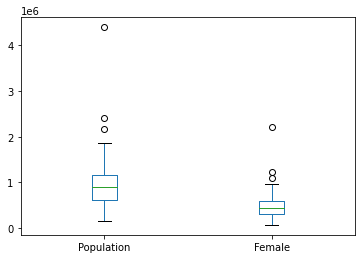

In [108]:
#a: outliers
#Data Cleaning Action:clearing outliers
# Explanation:this help in accuracy when it comes to data analysis.
#
#importing required libruary
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 
#
#indentifying the outliers
df2.boxplot(column =['Population', 'Female'], grid = False)

There were outliers due to the total population being included in the first row, but we kept them since dropping them will jeopardize the outcome which would have lead to biasied analysis.

## 2.3 completeness

In [82]:
# a:checking the missing dataset values
# Data Cleaning Action:dropping all the missing values
# Explanation:this ensures the data is complete and easy to manupulate
#
#checking missing data values
df2.isnull(). any()

name                                   False
Population                             False
Land Area (Sq. Km)                     False
Population Density (No. per Sq. Km)    False
Male                                   False
Female                                 False
Intersex                               False
Total_gender                           False
No.of Households                       False
Avg Household size                     False
dtype: bool

there  were *no* missing values

In [83]:
# verifing if there's nolonger missing values
df2.isnull(). sum()

name                                   0
Population                             0
Land Area (Sq. Km)                     0
Population Density (No. per Sq. Km)    0
Male                                   0
Female                                 0
Intersex                               0
Total_gender                           0
No.of Households                       0
Avg Household size                     0
dtype: int64

this confirms there were null values in this Dataset

## 2.4 Consistency

In [109]:
#a: checking duplicate values
#Data Cleaning Action:dropping the duplicated values in case they are there.
# Explanation:this ensures the data is complete and gives credible result deuring analysis.
#
df2.duplicated()

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool

No duplicate found.

## 2.5 uniformity

In [85]:
#a: checking if colunms names need to be changed, name changed to uppercases, and converting strings to datetime
# Data Cleaning Action:Renaming dataframe colunm and coverting string to datetime
# Explanation:makes manupulation easy
#
#
df1.columns


Index(['name', 'Population', 'Land Area (Sq. Km)',
       'Population Density (No. per Sq. Km)', 'Male', 'Female', 'Intersex',
       'Total_gender', 'No.of Households', 'Avg Household size', 'number'],
      dtype='object')

In [86]:
#b. Renaming colunms
df2_renamed=df2.rename(columns={"name":"County", "Land Area (Sq. Km)":"Land_area_sq_km", "Population Density (No. per Sq. Km)" : "Pop_density_number_per_sq_km", "No.of Households": "No_of_households", "Avg Household size": "Avg_household_size" }, inplace=True)


we renamed 5 colunms; name, Land Area (Sq. Km), Population Density (No. per Sq. Km), Total_gender', 'No.of Households, and Avg Household size. this is for easy manupulation.

In [87]:
#c. confirming the renaming of colunms
df2.columns

Index(['County', 'Population', 'Land_area_sq_km',
       'Pop_density_number_per_sq_km', 'Male', 'Female', 'Intersex',
       'Total_gender', 'No_of_households', 'Avg_household_size'],
      dtype='object')

In [88]:
# preview of clean dataset
df2_clean_Dataset = df2
df2_clean_Dataset.head()

,County,Population,Land_area_sq_km,Pop_density_number_per_sq_km,Male,Female,Intersex,Total_gender,No_of_households,Avg_household_size
1,Mombasa,1208333,219.9,5495,610257,598046,30,1208333,378422,31
2,Kwale,866820,8267.1,105,425121,441681,18,866820,173176,50
3,Kilifi,1453787,12539.7,116,704089,749673,25,1453787,298472,48
4,Tana River,315943,37950.5,8,158550,157391,2,315943,68242,46
5,Lamu,143920,6253.3,23,76103,67813,4,143920,37963,37


In [89]:
#cheking the attribute of the clean dataset
df2.shape

(47, 10)

This is our final dataset after data cleaning. it has 47 rows and 10 colunms.

In [90]:
#summary statistics
df2.describe()

,Population,Land_area_sq_km,Pop_density_number_per_sq_km,Male,Female,Intersex,Total_gender,No_of_households,Avg_household_size
count,4.700000e+01,47.000000,47.000000,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,4.700000e+01,47.000000
mean,1.012006e+06,12359.074468,509.148936,5.010225e+05,5.109514e+05,32.425532,1.012006e+06,2.583811e+05,42.319149
std,6.932427e+05,17366.002689,1175.429468,3.423677e+05,3.513158e+05,38.490961,6.932427e+05,2.344552e+05,8.841863
min,1.439200e+05,219.900000,6.000000,7.610300e+04,6.781300e+04,2.000000,1.439200e+05,3.796300e+04,29.000000
25%,6.095050e+05,2530.350000,52.500000,3.031095e+05,3.112910e+05,18.000000,6.095050e+05,1.419560e+05,35.000000
50%,8.936810e+05,3325.000000,221.000000,4.507410e+05,4.488680e+05,25.000000,8.936810e+05,2.041880e+05,43.000000
75%,1.156724e+06,14845.850000,416.000000,5.699920e+05,5.897590e+05,34.000000,1.156724e+06,3.028440e+05,46.500000
max,4.397073e+06,70944.100000,6247.000000,2.192452e+06,2.204376e+06,245.000000,4.397073e+06,1.506888e+06,69.000000



*   The were 47 rows representing respective county
*   under population, the mean was 1012006.29, minmum 143920, maximum 4397073, and std 693242.70
*   This can be repricated on other colunms







## 3.0 Data Analysis using python

In [91]:
#3.1 Identify the total population in 2019 census
df2_total_population=df2["Population"]. sum()
df2_total_population

47564296

the kenyan total population as per 2019 census was 47564296

In [92]:
#3.2 Identify the most populated Counties as per the 2019 Census
#
df2_most_populated = df2.groupby(["County"])["Population"]. sum()
df2_most_populated.sort_values(ascending=False).head(10)

County
Nairobi     4397073
Kiambu      2417735
Nakuru      2162202
Kakamega    1867579
Bungoma     1670570
Meru        1545714
Kilifi      1453787
Machakos    1421932
Kisii       1266860
Mombasa     1208333
Name: Population, dtype: int64

Nairobi was the most populated county with 4397073

In [93]:
#3.3 Identify the most densely populated county per sq.km.
df2_most_populated_sq_km = df2.groupby(["County"])["Pop_density_number_per_sq_km"].sum()
df2_most_populated_sq_km.sort_values(ascending=False). head(3)

County
Nairobi    6247
Mombasa    5495
Vihiga     1047
Name: Pop_density_number_per_sq_km, dtype: int64

Nairobi was the most densely populated county per square kilometer followed by Mombasa and Vihiga.

In [94]:
#3.4 Identify the county with the highest average households
df2_highest_avg = df2.groupby(["County"])["Avg_household_size"]. sum()
df2_highest_avg.sort_values(ascending=False).head(10)

County
Mandera       69
Wajir         61
Garissa       59
Marsabit      58
Turkana       56
West Pokot    53
Kwale         50
Narok         48
Kilifi        48
Baringo       47
Name: Avg_household_size, dtype: int64

Mandera had the highest average household size per hosehold in the entire country followed by Mandera and wajir.

In [95]:
#3.5 Identify the county with the highest land area per sqaure kilometer
df2_highest_avg = df2.groupby(["County"])["Land_area_sq_km"]. sum()
df2_highest_avg.sort_values(ascending=False).head(10)

County
Marsabit      70944.1
Turkana       68232.9
Wajir         56773.1
Garissa       44736.0
Tana River    37950.5
Kitui         30429.5
Mandera       25939.8
Isiolo        25350.6
Kajiado       21871.1
Samburu       21065.1
Name: Land_area_sq_km, dtype: float64

Marsabit county has the highest land area per square kilometer followed by Turkana and Wajir.

In [96]:
#3.6 Indentify the 3 least sparsely  populated Counties?
#
df2_least_populated = df2.groupby(["County"])["Population"]. sum()
df2_most_populated.sort_values(ascending=True). head(3)

County
Lamu       143920
Isiolo     268002
Samburu    310327
Name: Population, dtype: int64

Lamu county was the least populated followed by Isiolo and Samburu

In [97]:
#3.7 The least densely  populated county per sq.km
df2_least_populated = df2.groupby(["County"])["Pop_density_number_per_sq_km"]. sum()
df2_most_populated.sort_values(ascending=True).head(3)

County
Lamu       143920
Isiolo     268002
Samburu    310327
Name: Population, dtype: int64

Lamu was the least densely populated per sq.km followed by Isiolo and Samburu.

In [98]:
#3.8 Intersex gender distributed among counties
df2_intersex_gander = df2.groupby(["County"])["Intersex"]. sum()
df2_intersex_gander.sort_values(ascending=False)

County
Nairobi            245
Kiambu             135
Nakuru              95
Wajir               49
Meru                41
Kakamega            40
Kisii               38
Kajiado             38
Mandera             37
Bungoma             35
Migori              35
Machakos            34
Garissa             34
Kitui               33
Kirinyaga           31
Murang'a            31
Nyeri               31
Mombasa             30
Busia               28
Uasin Gishu         28
Trans Nzoia         28
Kericho             28
Narok               26
Kilifi              25
Embu                24
Kisumu              23
Homa Bay            23
Bomet               23
Nandi               22
Turkana             21
Makueni             20
Nyandarua           20
Marsabit            18
Siaya               18
Laikipia            18
Kwale               18
West Pokot          15
Nyamira             13
Baringo             13
Elgeyo-Marakwet     12
Vihiga              12
Isiolo               9
Samburu              7
Tait

there were significant number of counties with intersex gender.

## Correlation matrix  of the values

In [ ]:
#converting str to integers

In [127]:
# 3.9a. indentifying the correletion matrix of the values
df2.corr()
df2['Total_gender'].corr(df2['No_of_households'])

0.9727290959521431

there was a high correlation of 0.97 between population and number of households. this explains why Nairobi had the highest population as well as number of households as well.



In [126]:
#df3.9b correlation matrix 
df2.corr()
df2['Total_gender'].corr(df2['Pop_density_number_per_sq_km'])

0.6378102752424741

the correlation between population and population density number per square kilometer was 0.63. this means a high relationship between the 2 as well.

In [101]:
#more insight can be drawn from below
df2.corr()

,Population,Land_area_sq_km,Pop_density_number_per_sq_km,Male,Female,Intersex,Total_gender,No_of_households,Avg_household_size
Population,1.000000,-0.229951,0.637810,0.999296,0.999331,0.917011,1.000000,0.972729,-0.286602
Land_area_sq_km,-0.229951,1.000000,-0.264309,-0.208841,-0.250221,-0.123409,-0.229951,-0.281381,0.645037
Pop_density_number_per_sq_km,0.637810,-0.264309,1.000000,0.642900,0.631978,0.653953,0.637810,0.706400,-0.366180
Male,0.999296,-0.208841,0.642900,1.000000,0.997255,0.923833,0.999296,0.973732,-0.277179
Female,0.999331,-0.250221,0.631978,0.997255,1.000000,0.909103,0.999331,0.970427,-0.295395
Intersex,0.917011,-0.123409,0.653953,0.923833,0.909103,1.000000,0.917011,0.951147,-0.282869
Total_gender,1.000000,-0.229951,0.637810,0.999296,0.999331,0.917011,1.000000,0.972729,-0.286602
No_of_households,0.972729,-0.281381,0.706400,0.973732,0.970427,0.951147,0.972729,1.000000,-0.437639
Avg_household_size,-0.286602,0.645037,-0.366180,-0.277179,-0.295395,-0.282869,-0.286602,-0.437639,1.000000


In [115]:
df2.columns

Index(['County', 'Population', 'Land_area_sq_km',
       'Pop_density_number_per_sq_km', 'Male', 'Female', 'Intersex',
       'Total_gender', 'No_of_households', 'Avg_household_size'],
      dtype='object')

## finding the relationship between variables

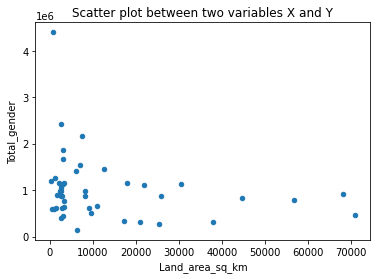

In [121]:
#import matplotlib.pyplot as plot
df2.plot.scatter(x='Land_area_sq_km', y='Total_gender', title= "Scatter plot between two variables X and Y");

This means large land area does not necessary translate to high population, thus farming might not be good idea in some counties with larges land mass due to harsh climatic conditions.However, with some condition it might work out.
small land area means a happy table area. 
Nairobi county is outlier since is the capital city and industrialized.

smaller land area has a larger population.
The government should consider power generation  in Marsabit using solar which will add power to national grid, this is because of high land mass.
Farming can be done in Marsabit as well using irrigration.


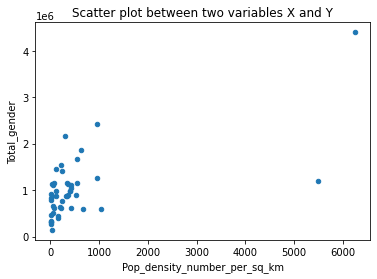

In [122]:
#checking the scatter plot.
df2.plot.scatter(x='Pop_density_number_per_sq_km', y='Total_gender', title= "Scatter plot between two variables X and Y");

nairobi is outlier this is because of favourable climatic condition, job opportunities due to industralization.

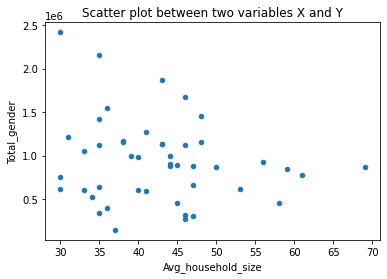

In [128]:
df3 = df2[df2["County"]!="Nairobi"]
df3.count()
df3.plot.scatter(x='Avg_household_size', y='Total_gender', title= "Scatter plot between two variables X and Y");

The higher populated counties has low number of households and the reverse is true.

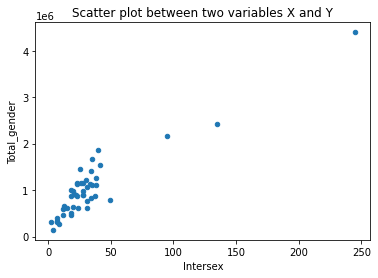

In [129]:
# intersex and population
df2.plot.scatter(x='Intersex', y='Total_gender', title= "Scatter plot between two variables X and Y");


this shows the higher the population the higher the intersex. this means the more people we have the more complex gender will arise.


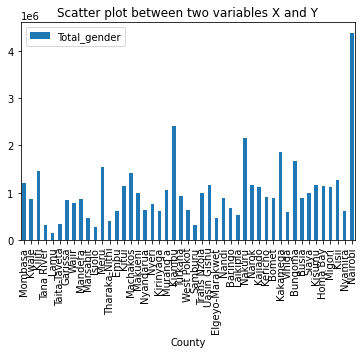

In [137]:
#checking the population distribution across counties
df2.plot.bar(x='County', y='Total_gender', title= "Scatter plot between two variables X and Y");

From above bar graph, nairobi has got the highest population and Lamu the lowest.

## **SQL**

In [104]:
# saving the cleaned Dataframe as csv in the working directory to be used in sql
df2.to_csv("population1.csv")

This is the clean Dataset after data cleaning which we will use to answer sql queries.



##4.0 **loading sql extention**

##4.1 loading the libraries and creating pandas Dataframe

In [ ]:
# We will first load the sql extension into our environment
#
%load_ext sql

In [ ]:
#Then connect to our in memory sqlite database
#
%sql sqlite://

we load sql extension and connect sqlite to enable our Dataset work.

##4.2 Importing Data From a CSV File

In [ ]:
import csv
import pandas as pd

The pupulation csv file can be downloaded [here](https://docs.google.com/spreadsheets/d/1MP25oy-2XG1xEMXI3Tyt4iBSS73vnnL-0XzVyLau8R8/edit?usp=sharing)

In [ ]:
# Loading the first table from a local CSV file
#
with open('population1.csv','r') as f:
     population1 = pd.read_csv(f, index_col=0, encoding='utf-8')

# Then storing it in an SQL table in our  memory sqlite database
#
%sql DROP TABLE if EXISTS population1;
%sql PERSIST population1;

we load our table ready for use.

In [ ]:
# Let's preview our population table so that we can understand it
# Try to understand all the attributes (i.e columns)
#
%%sql 
select * from population1 limit 5;

our dataset has the following colunms,County, Population,	Land_area_sq_km, Pop_density-number_per_sq_km,	Male,	Female,	Intersex,	Total_gender	No_of_households, and Avg_household_size.

The first colunm is for kenyan counties and it holds unique 
county names and the row represents the values of the county.

## 5.0 Data analysis using SQL

In [105]:
#5.1 Identify the total population in 2019 census
%%sql
SELECT SUM(population) AS "2019 kENYAN POPULATION" FROM population1;

 * sqlite://
Done.


2019 kENYAN POPULATION
47564296


In [ ]:
#5.2 Identify the most populated Counties as per the 2019 Census
%%sql
SELECT county as "most populated counties",population
FROM population1
GROUP BY population
ORDER BY population DESC limit 5;


In [ ]:
#5.3 Identify the most densely populated county per sq.km.
%%sql
SELECT county as "most densily pop county",Pop_density_number_per_sq_km
FROM population1
GROUP BY Pop_density_number_per_sq_km
ORDER BY Pop_density_number_per_sq_km DESC limit 5;


In [ ]:
#5.4 Identify the county with the highest average households
#
%%sql
SELECT county as "highest avg hoosehold counties",Avg_household_size
FROM population1
GROUP BY Avg_household_size
ORDER BY Avg_household_size DESC limit 5;

In [ ]:
#5.5 Identify the county with the highest land area per sqaure kilometer
#
%%sql
SELECT county as "counties with highest land area",Land_area_sq_km
FROM population1
GROUP BY Land_area_sq_km
ORDER BY Land_area_sq_km DESC limit 5;

The county with the highest land area was Marsabit followed by Turkana.

In [ ]:
#5.6 The least sparsely populated counties?
#
%%sql
SELECT county as "least populated counties",population
FROM population1
GROUP BY population
ORDER BY population ASC limit 5;


The least populated county as per  2019 census was Lamu, followed by Isiolo.

In [ ]:
#5.7 The least densely  populated county per sq.km
%%sql
SELECT county as "Least densely populated counties",Pop_density_number_per_sq_km
FROM population1
GROUP BY Pop_density_number_per_sq_km
ORDER BY Pop_density_number_per_sq_km ASC limit 5;


the least densely populated county was Marsabit followed by Tana River,Isiolo and Turkana

**we were able to carry out our analysis with both python pandas and SQL and the dive impressive similar results.**

## **Recomendations**
---
*   From our analysis, we would recommend that the government prioritize on allocating more finances to Nairobi and Kiambu county. However, Mombasa should be considered as well since it's the 3rd most populated per square kilometer. The government should increase infrastructures like water supply, roads as well as security since the crime rate might mushroom because of the high population. 
*  The government should consider power generation  in Marsabit using solar which will add power to national grid, this is because of high land mass.
Farming can be done in Marsabit as well using irrigration. 
*   The highest average household size was in Marsabit and Wajir counties. This can be as a result of family attachment culture..
*   we also noticed a sizeable number of intersex gender across counties and advised the government to consider them as well since there is no catering for their plights, for instance, all government documents do not mention intersex gender.






